## Chapter 1
This notebook contains notes and examples from chapter 1 from the book:
### An Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido (O’Reilly). 
Copyright 2017 Sarah Guido and Andreas Müller, 978-1-449-36941-5.



Notes: 

Machine learning algorithms that learn from input/output pairs arecalled supervised learning algorithms because a “teacher” providessupervision to the algorithms in the form of the desired outputs foreach example that they learn from. 

In unsupervised learning, only the input data is known, and no known output data is given to the algorithm.

Often it is helpful to think of your data as a table. Each data point that you want to reason about (each email, each customer, each transaction) is a row, and each property that describes that data point (say, the age of a customer or the amount or location of a transaction) is a column.
 
Each entity or row here is known as a sample (or data point) in machine learning, while the columns—the properties that describe these entities—are called features.

building a good representation of your data, is called feature extraction or feature engineering.


Quite possibly the most important part in the machine learning process is understanding the data you are working with and how it relates to the task you want to solve. It will not be effective to randomly choose an algorithm and throw your data at it. It is necessary to understand what is going on in your dataset before you begin building a model. Each algorithm is different in terms of what kind of data and what problem setting it works best for. While you are building a machine learning solution, you should answer, or at least keep in mind, the following questions:

    What question(s) am I trying to answer? Do I think the data collected can answer that question?

    What is the best way to phrase my question(s) as a machine learning problem?

    Have I collected enough data to represent the problem I want to solve?

    What features of the data did I extract, and will these enable the right predictions?

    How will I measure success in my application?

    How will the machine learning solution interact with other parts of my research or business product?



Links:
https://scikit-learn.org/stable/index.html

https://scikit-learn.org/stable/user_guide.html

https://github.com/amueller/introduction_to_ml_with_python

http://scipy-lectures.org/

[Python for Data analysis by Wes McKinney](http://shop.oreilly.com/product/0636920023784.do)


In [1]:
!pip list
!which python

Package            Version
------------------ ----------
appdirs            1.4.4
attrs              19.3.0
backcall           0.1.0
black              19.10b0
bleach             3.1.5
blis               0.4.1
catalogue          1.0.0
certifi            2020.4.5.1
chardet            3.0.4
click              7.1.2
cycler             0.10.0
cymem              2.0.3
decorator          4.4.2
defusedxml         0.6.0
entrypoints        0.3
flake8             3.8.1
graphviz           0.14
idna               2.9
ipykernel          5.2.1
ipython            7.14.0
ipython-genutils   0.2.0
ipywidgets         7.5.1
jedi               0.17.0
Jinja2             2.11.2
joblib             0.15.1
jsonschema         3.2.0
jupyter            1.0.0
jupyter-client     6.1.3
jupyter-console    6.1.0
jupyter-core       4.6.3
kiwisolver         1.2.0
MarkupSafe         1.1.1
matplotlib         3.2.1
mccabe             0.6.1
mistune            0.8.4
murmurhash         1.0.2
nbconvert          5.6.1
nbformat  

In [3]:
import numpy as np
x = np.array([[1,2,3],[4,5,6]])
print(f'x:\n{x}')


x:
[[1 2 3]
 [4 5 6]]


In [4]:
from scipy import sparse

# create a numpy array with ones in the diagonal and zeroes everwhere else - Identity matrix
eye = np.eye(4)
print(f'Numpy Array:\n {eye}')


Numpy Array:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [5]:
# Convert the NumPy array to a SciPy sparse matrix in CSR format
# Only the nonzero entries are stored
sparse_matrix = sparse.csr_matrix(eye)
print(f'Scipy sparse CSR matrix:\n{sparse_matrix}')

Scipy sparse CSR matrix:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [7]:
# sometimes it may not be possible to create dense represnetaion of sparse data due to memory restrictions
# How to create sparse matrix directly

data = np.ones(4)
row_indices = np.arange(4)
column_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, column_indices)))
print(f'COO representation:\n{eye_coo}')

COO representation:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


<IPython.core.display.Javascript object>


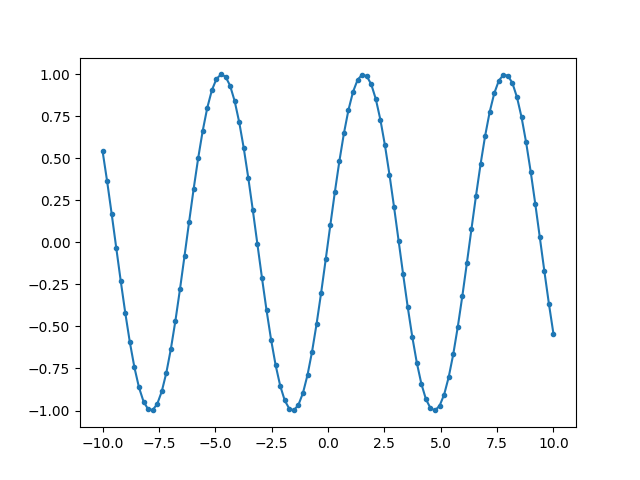

In [11]:
%matplotlib notebook
from matplotlib import pyplot as plt
# Generate a sequence of numbers from -10 to 10 with 100 steps in between
x = np.linspace(-10, 10, 100)
# create secondary array using sine
y = np.sin(x)
# plot function makes a line chart of x against y
plt.plot(x, y, marker = '.')


In [15]:
import pandas as pd

# create a simple dataset of people
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }

df = pd.DataFrame(data)
display(df)

display(df[df.Age > 30])

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


In [16]:
import sys
print("Python version:", sys.version)

import pandas as pd
print("pandas version:", pd.__version__)

import matplotlib
print("matplotlib version:", matplotlib.__version__)

import numpy as np
print("NumPy version:", np.__version__)

import scipy as sp
print("SciPy version:", sp.__version__)

import IPython
print("IPython version:", IPython.__version__)

import sklearn
print("scikit-learn version:", sklearn.__version__)

Python version: 3.8.2 (default, Feb 26 2020, 02:56:10) 
[GCC 7.4.0]
pandas version: 1.0.3
matplotlib version: 3.2.1
NumPy version: 1.18.4
SciPy version: 1.4.1
IPython version: 7.14.0
scikit-learn version: 0.23.0


## Classifying Iris Species
Data set has leng and width of sepal and petal belonging to the species *setosa, versicolor, or virginica*. Assume that these are the only 3 species. Build a machine learning model that can predict the species of a new iris. 

We have training data => this is a **supervised learning problem**

We want to predict one of the 3 options for new iris => This is a **classification problem**

Possible outputs *setosa, versicolor, or virginica* => **classes** This is a three class classification problem

For a perticular **data point** , the specieis it belongs to => **label**